In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

sns.set_style('darkgrid')

In [ ]:
sales_df = pd.read_excel('Data_Set_12.xlsx')
sales_df.head()

,Postcode,Sales_Rep_ID,Sales_Rep_Name,Year,Value
0,2121,456,Jane,2011,84219.497311
1,2092,789,Ashish,2012,28322.192268
2,2128,456,Jane,2013,81878.997241
3,2073,123,John,2011,44491.142121
4,2134,789,Ashish,2012,71837.720959


In [ ]:
sales_df = sales_df.rename(
    columns={'Sales_Rep_Name': 'Sales_Representative', 'Sales_Rep_ID': 'Sales_Representative_ID'})
sales_df.head()

,Postcode,Sales_Representative_ID,Sales_Representative,Year,Value
0,2121,456,Jane,2011,84219.497311
1,2092,789,Ashish,2012,28322.192268
2,2128,456,Jane,2013,81878.997241
3,2073,123,John,2011,44491.142121
4,2134,789,Ashish,2012,71837.720959


In [ ]:
sales_df.shape

(390, 5)

In [ ]:
sales_df.duplicated().sum()

0

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Postcode                 390 non-null    int64  
 1   Sales_Representative_ID  390 non-null    int64  
 2   Sales_Representative     390 non-null    object 
 3   Year                     390 non-null    int64  
 4   Value                    390 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 15.4+ KB


In [ ]:
sales_df.Value.describe()

,Value
count,390.000000
mean,49229.388305
std,28251.271309
min,106.360599
25%,26101.507357
50%,47447.363750
75%,72277.800608
max,99878.489209


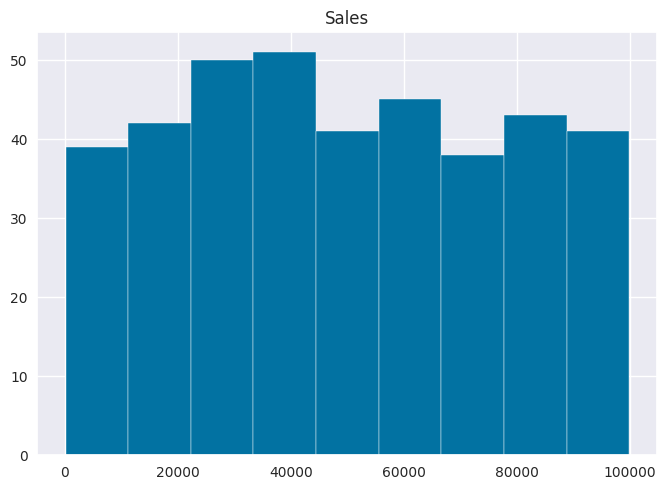

In [ ]:
plt.hist(sales_df.Value, bins=int(1 + np.log2(sales_df.shape[0])))
plt.title('Sales')
plt.show()

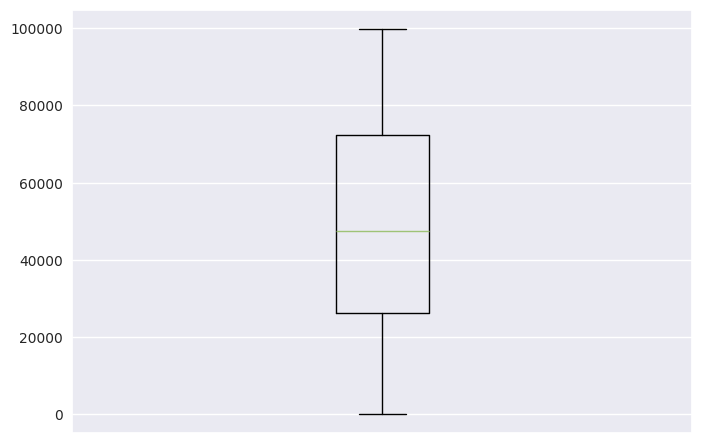

In [ ]:
plt.boxplot(sales_df.Value)
plt.xticks([])
plt.show()

In [ ]:
def plot_sales_by_year(df, year=None):
    if year:
        yearly_sales = df[df.Year == year]
    else:
        yearly_sales = df
    fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(10, 4))
    ax1.plot(yearly_sales.Value)
    ax2.hist(yearly_sales.Value, bins=int(1 + np.log2(yearly_sales.shape[0])), orientation='horizontal')
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    plt.tight_layout()
    plt.show()

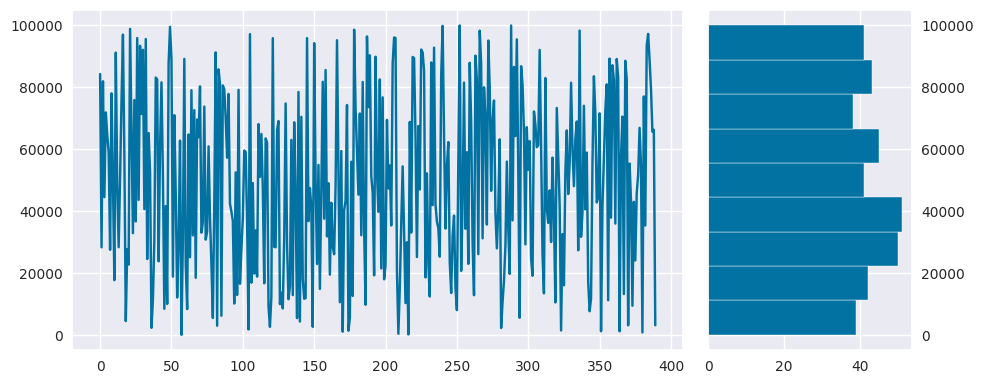

In [ ]:
plot_sales_by_year(sales_df)

In [ ]:
sales_df.Year.unique()

array([2011, 2012, 2013])

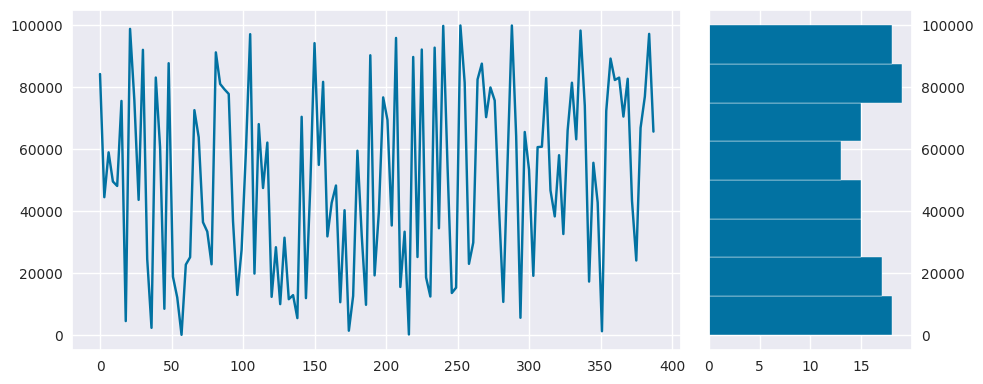

In [ ]:
plot_sales_by_year(sales_df, 2011)

In [ ]:
sales_df[sales_df.Year == 2011]['Value'].describe()

,Value
count,130.000000
mean,50587.583777
std,29878.520275
min,106.360599
25%,23263.014933
50%,51462.750310
75%,76913.658015
max,99878.489209


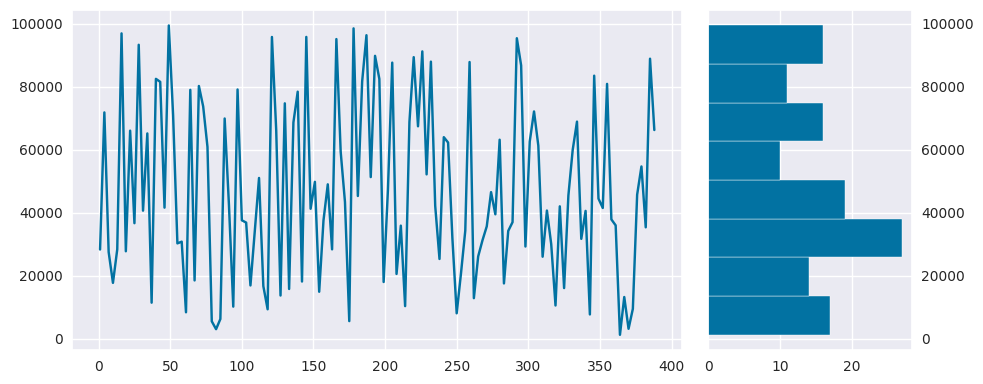

In [ ]:
plot_sales_by_year(sales_df, 2012)

In [ ]:
sales_df[sales_df.Year == 2012]['Value'].describe()

,Value
count,130.000000
mean,47322.615181
std,27944.690905
min,1246.105766
25%,26474.435621
50%,41818.462250
75%,69658.827311
max,99436.424098


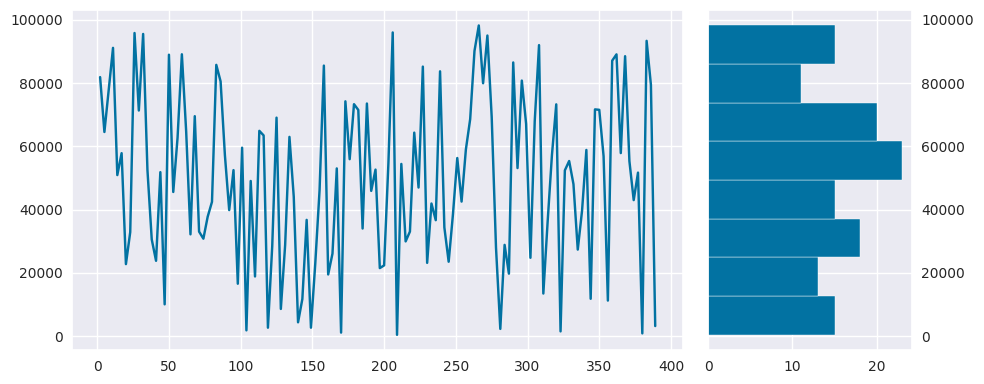

In [ ]:
plot_sales_by_year(sales_df, 2013)

In [ ]:
sales_df[sales_df.Year == 2013]['Value'].describe()

,Value
count,130.000000
mean,49777.965956
std,26968.856306
min,429.356425
25%,28824.251006
50%,52441.187887
75%,70873.817709
max,98199.933992


In [ ]:
sales_by_year = sales_df.groupby('Year')['Value'].sum().reset_index()
sales_by_year

,Year,Value
0,2011,6.576386e+06
1,2012,6.151940e+06
2,2013,6.471136e+06


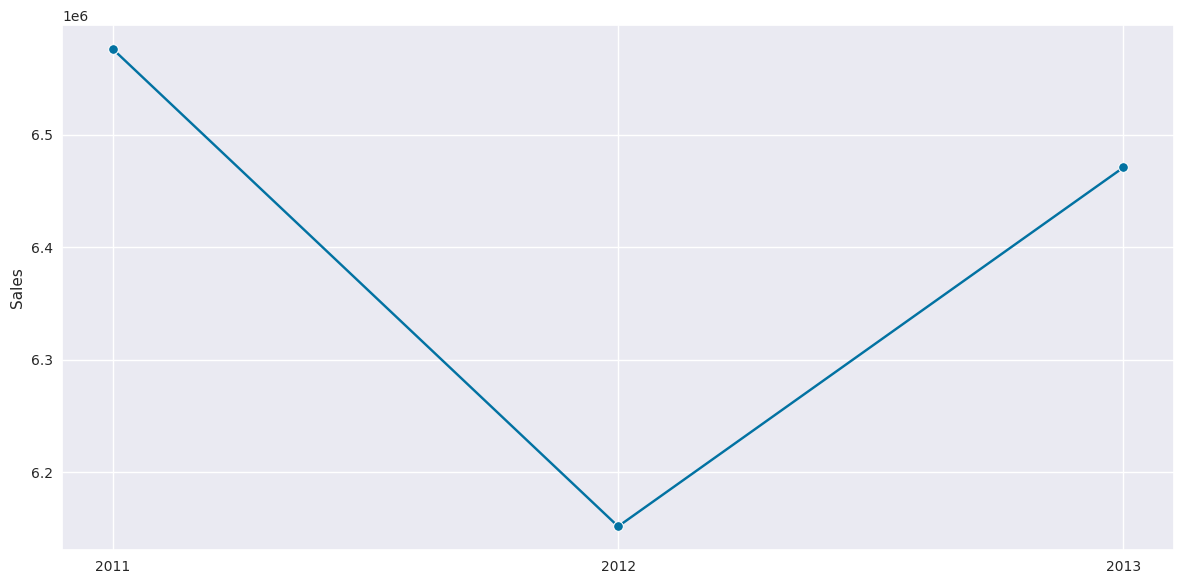

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(sales_by_year, x='Year', y='Value', marker='o')
plt.ylabel('Sales')
plt.xticks(sales_by_year.Year.unique())
plt.xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
avg_sales_year_representative = sales_df.groupby(['Year', 'Sales_Representative'])['Value'].mean().reset_index()
avg_sales_year_representative

,Year,Sales_Representative,Value
0,2011,Ashish,46829.122073
1,2011,Jane,56205.908485
2,2011,John,49643.635644
3,2012,Ashish,50141.586408
4,2012,Jane,47333.772158
5,2012,John,43912.806087
6,2013,Ashish,50580.899288
7,2013,Jane,50974.143450
8,2013,John,47779.602629


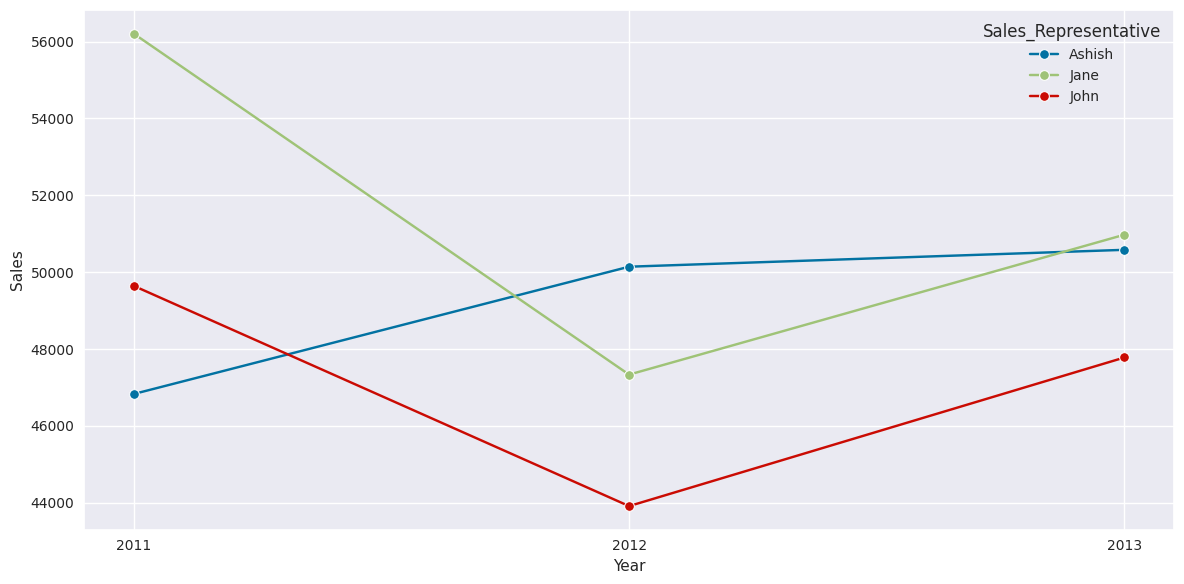

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(avg_sales_year_representative, x='Year', y='Value', hue='Sales_Representative', marker='o')
plt.ylabel('Sales')
plt.xticks(avg_sales_year_representative.Year.unique())
plt.tight_layout()
plt.show()

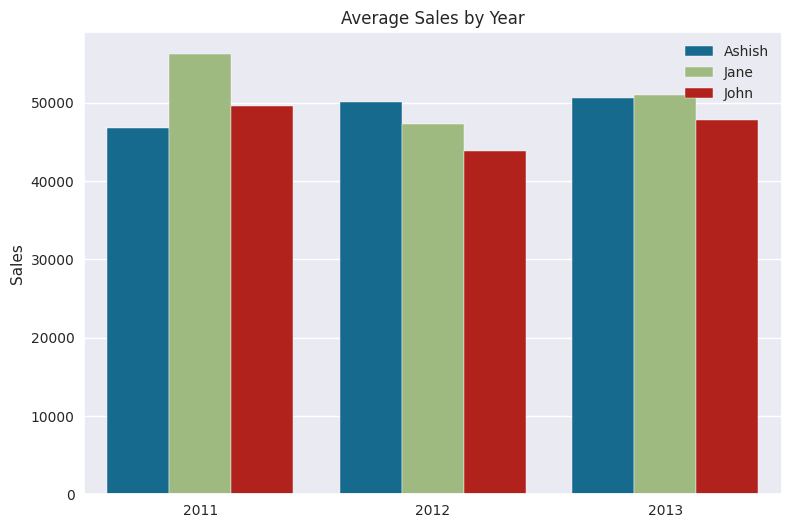

In [ ]:
plt.figure(figsize=(9, 6))
sns.barplot(data=avg_sales_year_representative, x='Year', y='Value', hue='Sales_Representative')
plt.ylabel('Sales')
plt.xlabel('')
plt.legend()
plt.title('Average Sales by Year')
plt.show()

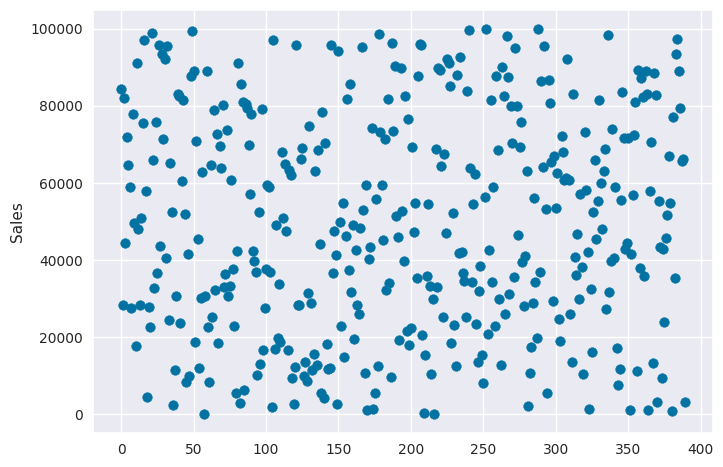

In [ ]:
plt.scatter(sales_df.index, sales_df.Value)
plt.ylabel('Sales')
plt.show()

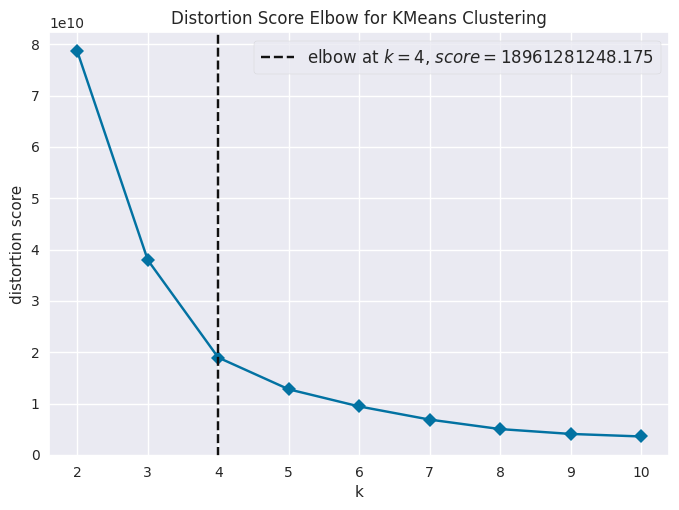

In [ ]:
kmeans = KMeans(n_init='auto')
visualizer = KElbowVisualizer(kmeans, k=(2, 11), timings=False)
visualizer.fit(sales_df[['Value']])
visualizer.show();

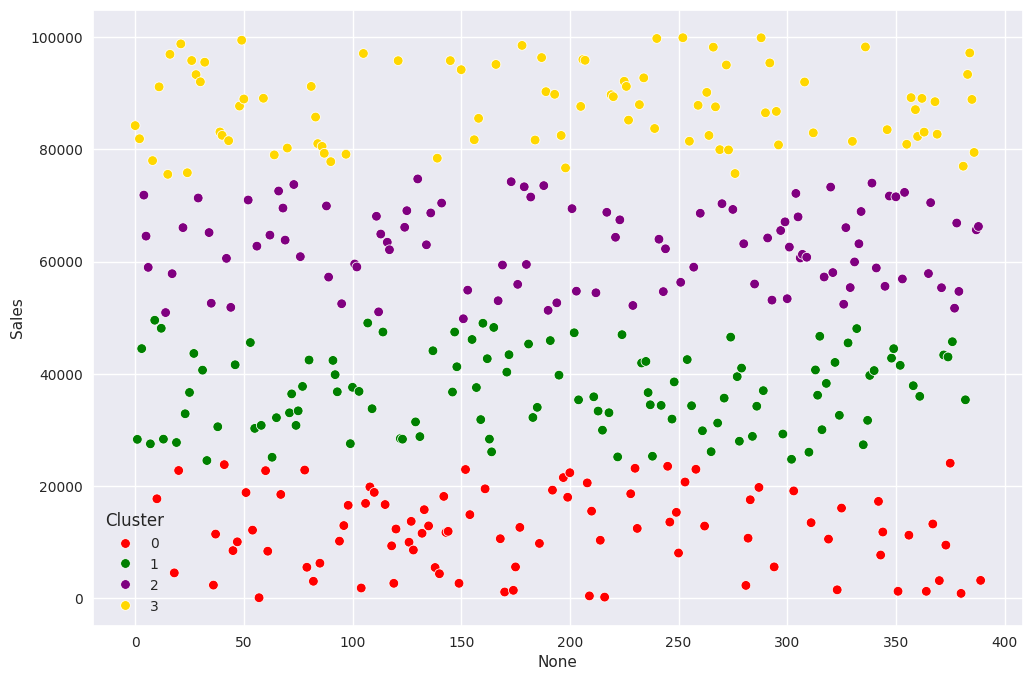

In [ ]:
kmeans = KMeans(n_init='auto', n_clusters=4)
clusters = kmeans.fit_predict(sales_df[['Value']])
sales_df['Cluster'] = clusters
cluster_means = sales_df.groupby('Cluster')['Value'].mean().sort_values()
cluster_mapping = {old_cluster: new_cluster for new_cluster, old_cluster in enumerate(cluster_means.index)}
sales_df['Cluster'] = sales_df['Cluster'].map(cluster_mapping)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sales_df, x=sales_df.index, y='Value', hue='Cluster', palette=['red', 'green', 'purple', 'gold'])
plt.ylabel('Sales')
plt.show()

In [ ]:
sales_by_clusters = sales_df.groupby(['Cluster', 'Sales_Representative'])['Value'].count().reset_index()
sales_by_clusters

,Cluster,Sales_Representative,Value
0,0,Ashish,30
1,0,Jane,29
2,0,John,32
3,1,Ashish,40
4,1,Jane,32
5,1,John,39
6,2,Ashish,30
7,2,Jane,36
8,2,John,33
9,3,Ashish,30


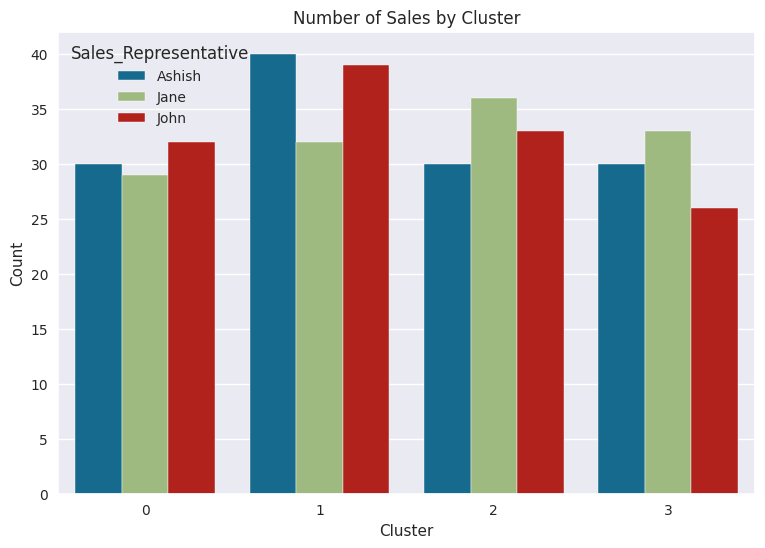

In [ ]:
plt.figure(figsize=(9, 6))
sns.barplot(data=sales_by_clusters, x='Cluster', y='Value', hue='Sales_Representative')
plt.ylabel('Count')
plt.title('Number of Sales by Cluster')
plt.show()

In [ ]:
sales_by_clusters = sales_df.groupby(['Cluster', 'Year'])['Value'].count().reset_index()
sales_by_clusters

,Cluster,Year,Value
0,0,2011,34
1,0,2012,30
2,0,2013,27
3,1,2011,31
4,1,2012,46
5,1,2013,34
6,2,2011,28
7,2,2012,27
8,2,2013,44
9,3,2011,37
